In [1]:
# Autor: Jairo Valea López
# Programa para el graficado de los datos del espectrómetro por rangos de visibilidad

# Importado de librerías más comunes

import os
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import time
import matplotlib
import scipy as sp
from sklearn import metrics
from IPython.utils import io
from natsort import natsorted
from IPython.display import HTML
from tqdm.notebook import tqdm, trange # barra de progreso
from matplotlib import pyplot as plt
from matplotlib import gridspec

%matplotlib notebook

def promedio(lst):
    return sum(lst) / len(lst)

In [2]:
#
#
# Gráficos separados por tramos de visibilidad:
#
#

ruta_proces = 'C:\\Users\\miguel.anton\\Desktop\\NIEBLA\\Ensayos procesados\\'

carpeta = natsorted(os.listdir(ruta_proces))
procesados = []
nombres = []

for f in carpeta:
    name, ext = os.path.splitext(f)
    if ext == '.txt':
        procesados.append(pd.read_csv(ruta_proces + name + ext, delimiter = ",", decimal = "."))
        nombres.append(name + ext)

procesados_total = pd.concat(procesados,ignore_index = True)
procesados_total = procesados_total.apply(lambda col:pd.to_numeric(col, errors='coerce'))
procesados_total = procesados_total.dropna()
procesados_total = procesados_total[procesados_total['Visibilidad corregida (m)'] != 0]
#procesados_total.reset_index(drop=True, inplace=True)

In [ ]:
# TODO, SOLO GRUESOS, NORMALIZADO

dx = [0.007,0.008,0.009,0.009,0.01,0.011,0.011,0.012,0.013,0.014,0.015,0.016,0.018,0.019,0.02,0.022,0.024,0.025,0.027
,0.029,0.031,0.034,0.036,0.039,0.042,0.045,0.048,0.052,0.056,0.06,0.065,0.069,0.075,0.08,0.086,0.093,0.099,0.107,0.115
,0.123,0.133,0.143,0.153,0.165,0.177,0.19,0.204,0.22,0.236,0.254,0.272,0.293,0.315,0.338,0.363,0.39,0.42,0.451,0.484
,0.521,0.559,0.601,0.646,0.694,0.746,0.802,0.862,0.926,0.995,1.069,1.149,1.235,1.327]

diams_f = procesados[0].iloc[60,3:45] # vectores con los tamaños de partícula (separados en finos y gruesos)
diams_g = procesados[0].iloc[60,45:76]
diams = procesados[0].iloc[60,3:76]

menos_20 = procesados_total.loc[procesados_total["Visibilidad corregida (m)"] <= 20]
de20_30 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 20) & (procesados_total["Visibilidad corregida (m)"] <= 30)]
de30_40 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 30) & (procesados_total["Visibilidad corregida (m)"] <= 40)]
de40_50 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 40) & (procesados_total["Visibilidad corregida (m)"] <= 50)]
de50_60 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 50) & (procesados_total["Visibilidad corregida (m)"] <= 60)]
de60_70 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 60) & (procesados_total["Visibilidad corregida (m)"] <= 70)]
de70_80 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 70) & (procesados_total["Visibilidad corregida (m)"] <= 80)]
de80_90 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 80) & (procesados_total["Visibilidad corregida (m)"] <= 90)]
de90_100 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 90) & (procesados_total["Visibilidad corregida (m)"] <= 100)]
de100_110 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 100) & (procesados_total["Visibilidad corregida (m)"] <= 110)]
de110_120 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 110) & (procesados_total["Visibilidad corregida (m)"] <= 120)]
de120_130 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 120) & (procesados_total["Visibilidad corregida (m)"] <= 130)]
de130_140 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 130) & (procesados_total["Visibilidad corregida (m)"] <= 140)]
de140_150 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 140) & (procesados_total["Visibilidad corregida (m)"] <= 150)]
de150_160 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 150) & (procesados_total["Visibilidad corregida (m)"] <= 160)]
de160_170 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 160) & (procesados_total["Visibilidad corregida (m)"] <= 170)]
de170_180 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 170) & (procesados_total["Visibilidad corregida (m)"] <= 180)]
de180_190 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 180) & (procesados_total["Visibilidad corregida (m)"] <= 190)]
de190_200 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 190) & (procesados_total["Visibilidad corregida (m)"] <= 200)]
de200_250 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 200) & (procesados_total["Visibilidad corregida (m)"] <= 250)]
de250_300 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 250) & (procesados_total["Visibilidad corregida (m)"] <= 300)]
de300_500 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 300) & (procesados_total["Visibilidad corregida (m)"] <= 500)]
de500_1000 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 500) & (procesados_total["Visibilidad corregida (m)"] <= 1000)]
de1000_2000 = procesados_total.loc[(procesados_total["Visibilidad corregida (m)"] > 1000) & (procesados_total["Visibilidad corregida (m)"] <= 2000)]

totales = [menos_20, de20_30, de30_40, de40_50, de50_60, de60_70, de70_80, de80_90, de90_100, de100_110, de110_120,
        de120_130, de130_140, de140_150, de150_160, de160_170, de170_180, de180_190, de190_200, de200_250, de250_300,
        de300_500, de500_1000, de1000_2000] # generada - quitar 120 a 140, 170 a 100

    
for i in totales:
    i.reset_index(drop=True, inplace=True)
    suma_total = []
    suma_gruesos = []
    suma_finos = []
    ult_col = i.shape[1]-2
    finos = np.array(i.iloc[:,3:45])
    gruesos = np.array(i.iloc[:,45:ult_col])
    for n in range(gruesos.shape[0]): # el mismo para ambos
        suma_gruesos.append(np.sum(gruesos[n,:]))
        suma_finos.append(np.sum(finos[n,:]))
        suma_total.append(suma_finos[n]+suma_gruesos[n])
    
    densidad_finos = np.empty((finos.shape[0],finos.shape[1]))
    densidad_gruesos = np.empty((gruesos.shape[0],gruesos.shape[1]))
    for k in range(finos.shape[0]):
        for l in range(finos.shape[1]):
            densidad_finos[k,l] = (1/suma_finos[k])*(finos[k,l])*(1/dx[l])
        for m in range(gruesos.shape[1]):
            densidad_gruesos[k,m] = (1/suma_gruesos[k])*(gruesos[k,m])*(1/dx[m+finos.shape[1]])
    maximo_f = np.max(densidad_finos)
    maximo_g = np.max(densidad_gruesos)
    
    media = []
    for k in range(31):
        media.append(promedio(densidad_gruesos[:,k]))
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_title('Visibilidad de ' + str(min(i.iloc[:,77])) + 'm a ' + str(max(i.iloc[:,77])) + ' m')
    ax.set_xscale('log')
    ax.set_ylim(0,0.7)
    ax.set_xlabel('Diámetro (um)')
    ax.set_ylabel('dN/N/dx')
    ax.set_xticks([0.1,0.5,1,2,5,10,18], minor=False)
    labels = [0.1,0.5,1,2,5,10,18]
    ax.set_xticklabels(labels)
    ax.grid(True)
    for j in range(len(i)):
        ax.plot(diams_g,densidad_gruesos[j,:], color='blue', alpha=0.6, linewidth = 0.5)
    ax.plot(diams_g,media, color = 'red',linewidth=1.5)
    plt.savefig(ruta_proces+ '/Gráficos/norm_' + str(min(i.iloc[:,77])) + '_a_' + str(max(i.iloc[:,77])) + '.png')

In [3]:
# Gráficos separados por tramos de visibilidad (condiciones extra):

ruta_proces = 'C:\\Users\\miguel.anton\\Desktop\\NIEBLA\\Ensayos procesados\\'

carpeta = natsorted(os.listdir(ruta_proces))
procesados = []
nombres = []

for f in carpeta:
    name, ext = os.path.splitext(f)
    if ext == '.txt':
        procesados.append(pd.read_csv(ruta_proces + name + ext, delimiter = ",", decimal = "."))
        nombres.append(name + ext)
        
diams_f = procesados[0].iloc[60,3:45] # vectores con los tamaños de partícula (separados en finos y gruesos)
diams_g = procesados[0].iloc[60,45:76]
diams = procesados[0].iloc[60,3:76]

solo_nie = []
procesados_ensayos = []
for i in range(len(nombres)):
    if (nombres[i][6] != '8'):
        procesados[i] = procesados[i].apply(lambda col:pd.to_numeric(col, errors='coerce'))
        procesados[i] = procesados[i].dropna()
        procesados[i] = procesados[i][procesados[i]['Visibilidad corregida (m)'] != 0]
        procesados_ensayos.append(procesados[i])
    else:
        procesados[i] = procesados[i].apply(lambda col:pd.to_numeric(col, errors='coerce'))
        procesados[i] = procesados[i].dropna()
        procesados[i] = procesados[i][procesados[i]['Visibilidad corregida (m)'] != 0]
        procesados[i].reset_index(drop=True, inplace=True)
        #
        # "LIMPIADOR" DE LOS DATOS CON DIFERENCIA DE VISIBILIDAD > X - ANTES DE APPEND
        #
        rolling_mean = procesados[i].iloc[:,77].rolling(5, min_periods = 1).mean()
        if (len(procesados[i]) > 0):
            for j in range(len(procesados[i]) - 1):
                if (abs(rolling_mean[j+1] - rolling_mean[j]) > 5):
                    procesados[i] = procesados[i].drop(j+1)
        procesados[i].reset_index(drop=True, inplace=True)
        #
        # FIN DEL LIMPIADOR DE DATOS
        #
        solo_nie.append(procesados[i])

procesados_ensayos = pd.concat(procesados_ensayos,ignore_index = True)
solo_nie = pd.concat(solo_nie,ignore_index = True)

ensayos_generada = procesados_ensayos.loc[(procesados_ensayos["Tiempo (min)"] > 9) & (procesados_ensayos["Tiempo (min)"] <= 33)]
ensayos_natural_pre = procesados_ensayos.loc[procesados_ensayos["Tiempo (min)"] < 9.5]
ensayos_natural_post = procesados_ensayos.loc[procesados_ensayos["Tiempo (min)"] > 33]

In [ ]:
# ensayos 8.xx // SOLO GRUESOS, NORMALIZADOS

dx = [0.007,0.008,0.009,0.009,0.01,0.011,0.011,0.012,0.013,0.014,0.015,0.016,0.018,0.019,0.02,0.022,0.024,0.025,0.027
,0.029,0.031,0.034,0.036,0.039,0.042,0.045,0.048,0.052,0.056,0.06,0.065,0.069,0.075,0.08,0.086,0.093,0.099,0.107,0.115
,0.123,0.133,0.143,0.153,0.165,0.177,0.19,0.204,0.22,0.236,0.254,0.272,0.293,0.315,0.338,0.363,0.39,0.42,0.451,0.484
,0.521,0.559,0.601,0.646,0.694,0.746,0.802,0.862,0.926,0.995,1.069,1.149,1.235,1.327]

menos_20 = solo_nie.loc[solo_nie["Visibilidad corregida (m)"] <= 20]
de20_30 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 20) & (solo_nie["Visibilidad corregida (m)"] <= 30)]
de30_40 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 30) & (solo_nie["Visibilidad corregida (m)"] <= 40)]
de40_50 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 40) & (solo_nie["Visibilidad corregida (m)"] <= 50)]
de50_60 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 50) & (solo_nie["Visibilidad corregida (m)"] <= 60)]
de60_70 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 60) & (solo_nie["Visibilidad corregida (m)"] <= 70)]
de70_80 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 70) & (solo_nie["Visibilidad corregida (m)"] <= 80)]
de80_90 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 80) & (solo_nie["Visibilidad corregida (m)"] <= 90)]
de90_100 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 90) & (solo_nie["Visibilidad corregida (m)"] <= 100)]
de100_110 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 100) & (solo_nie["Visibilidad corregida (m)"] <= 110)]
de110_120 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 110) & (solo_nie["Visibilidad corregida (m)"] <= 120)]
de120_130 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 120) & (solo_nie["Visibilidad corregida (m)"] <= 130)]
de130_140 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 130) & (solo_nie["Visibilidad corregida (m)"] <= 140)]
de140_150 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 140) & (solo_nie["Visibilidad corregida (m)"] <= 150)]
de150_160 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 150) & (solo_nie["Visibilidad corregida (m)"] <= 160)]
de160_170 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 160) & (solo_nie["Visibilidad corregida (m)"] <= 170)]
de170_180 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 170) & (solo_nie["Visibilidad corregida (m)"] <= 180)]
de180_190 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 180) & (solo_nie["Visibilidad corregida (m)"] <= 190)]
de190_200 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 190) & (solo_nie["Visibilidad corregida (m)"] <= 200)]
de200_250 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 200) & (solo_nie["Visibilidad corregida (m)"] <= 250)]
de250_300 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 250) & (solo_nie["Visibilidad corregida (m)"] <= 300)]
de300_500 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 300) & (solo_nie["Visibilidad corregida (m)"] <= 500)]
de500_1000 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 500) & (solo_nie["Visibilidad corregida (m)"] <= 1000)]
de1000_2000 = solo_nie.loc[(solo_nie["Visibilidad corregida (m)"] > 1000) & (solo_nie["Visibilidad corregida (m)"] <= 2000)]

totales = [menos_20, de20_30, de30_40, de40_50, de50_60, de60_70, de70_80, de80_90, de90_100, de100_110, de110_120,
        de120_130, de130_140, de140_150, de150_160, de160_170, de170_180, de180_190, de190_200, de200_250, de250_300,
        de300_500, de500_1000, de1000_2000]

for i in totales:
    i.reset_index(drop=True, inplace=True)
    suma_total = []
    suma_gruesos = []
    suma_finos = []
    ult_col = i.shape[1]-2
    finos = np.array(i.iloc[:,3:45])
    gruesos = np.array(i.iloc[:,45:ult_col])
    for n in range(gruesos.shape[0]): # el mismo para ambos
        suma_gruesos.append(np.sum(gruesos[n,:]))
        suma_finos.append(np.sum(finos[n,:]))
        suma_total.append(suma_finos[n]+suma_gruesos[n])
    
    densidad_finos = np.empty((finos.shape[0],finos.shape[1]))
    densidad_gruesos = np.empty((gruesos.shape[0],gruesos.shape[1]))
    for k in range(finos.shape[0]):
        for l in range(finos.shape[1]):
            densidad_finos[k,l] = (1/suma_finos[k])*(finos[k,l])*(1/dx[l])
        for m in range(gruesos.shape[1]):
            densidad_gruesos[k,m] = (1/suma_gruesos[k])*(gruesos[k,m])*(1/dx[m+finos.shape[1]])
    maximo_f = np.max(densidad_finos)
    maximo_g = np.max(densidad_gruesos)
    
    media = []
    for k in range(31):
        media.append(promedio(densidad_gruesos[:,k]))
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_title('Visibilidad de ' + str(min(i.iloc[:,77])) + 'm a ' + str(max(i.iloc[:,77])) + ' m')
    ax.set_xscale('log')
    ax.set_ylim(0,0.7)
    ax.set_xlabel('Diámetro (um)')
    ax.set_ylabel('dN/N/dx')
    ax.set_xticks([2,5,10,18], minor=False)
    labels = [2,5,10,18]
    ax.set_xticklabels(labels)
    ax.grid(True)
    for j in range(len(i)):
        ax.plot(diams_g,densidad_gruesos[j,:], color='blue', alpha=0.6, linewidth = 0.5)
    ax.plot(diams_g,media, color = 'red',linewidth=1.5)
    plt.savefig(ruta_proces+ 'Gráficos/soloniebla_norm_u10_' + str(min(i.iloc[:,77])) + '_a_' + str(max(i.iloc[:,77])) + '.png')

<IPython.core.display.Javascript object>


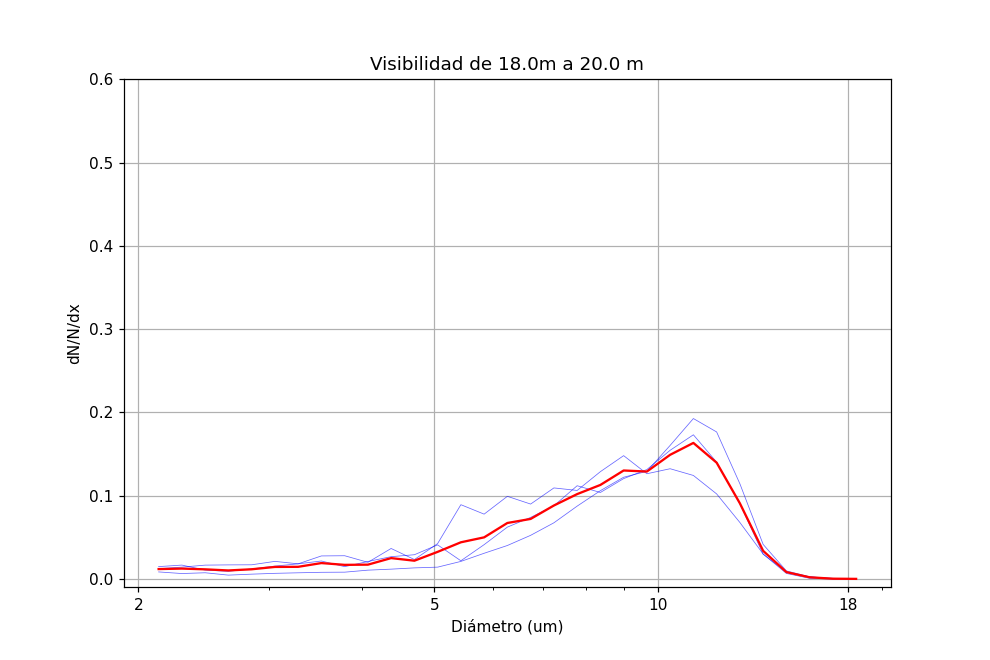

<IPython.core.display.Javascript object>


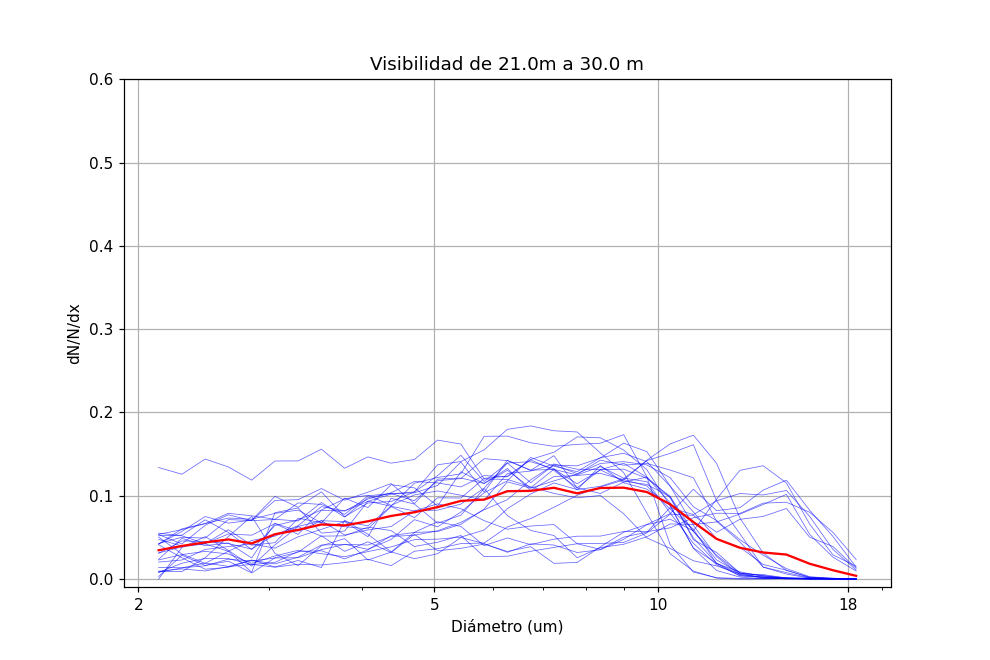

<IPython.core.display.Javascript object>


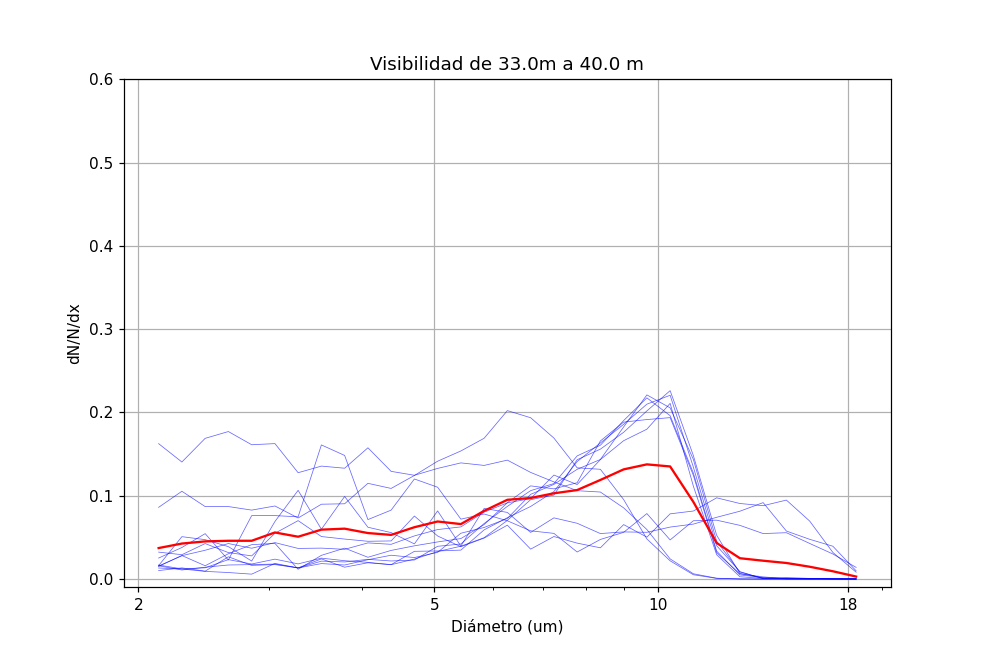

<IPython.core.display.Javascript object>


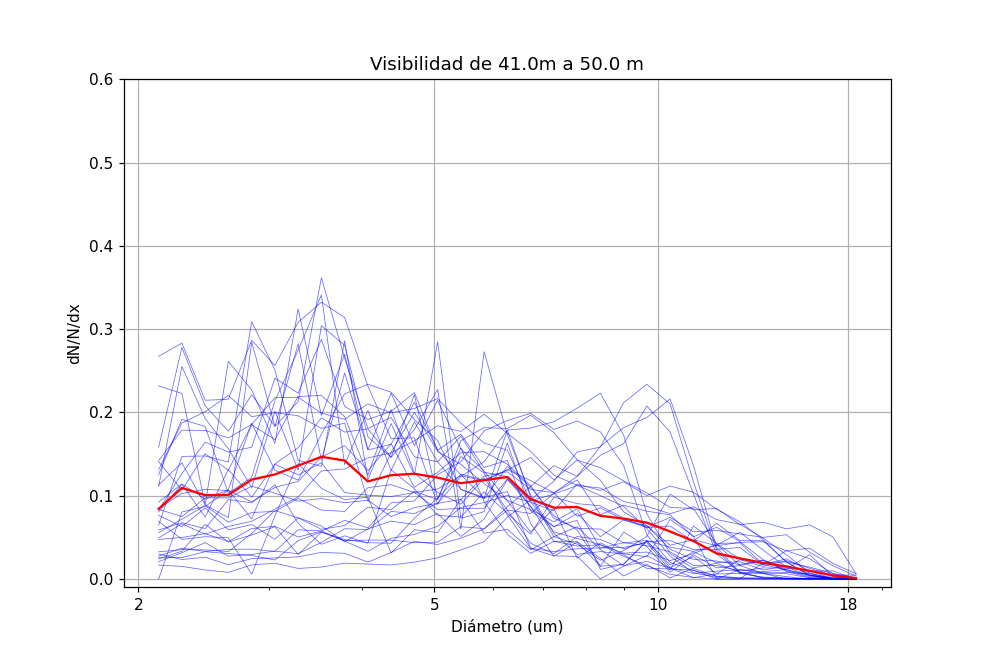

<IPython.core.display.Javascript object>


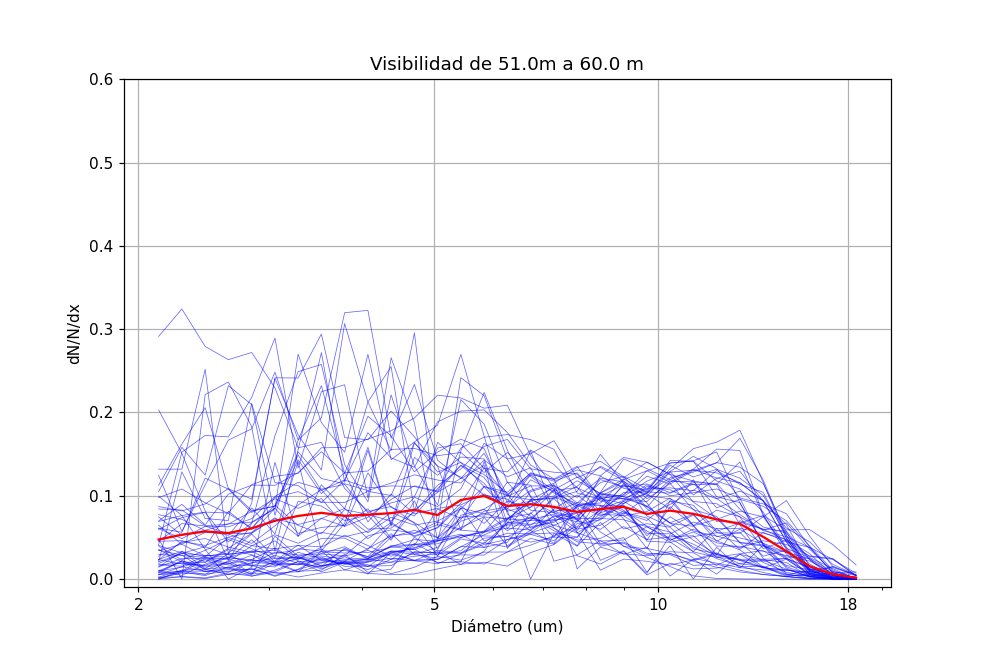

<IPython.core.display.Javascript object>


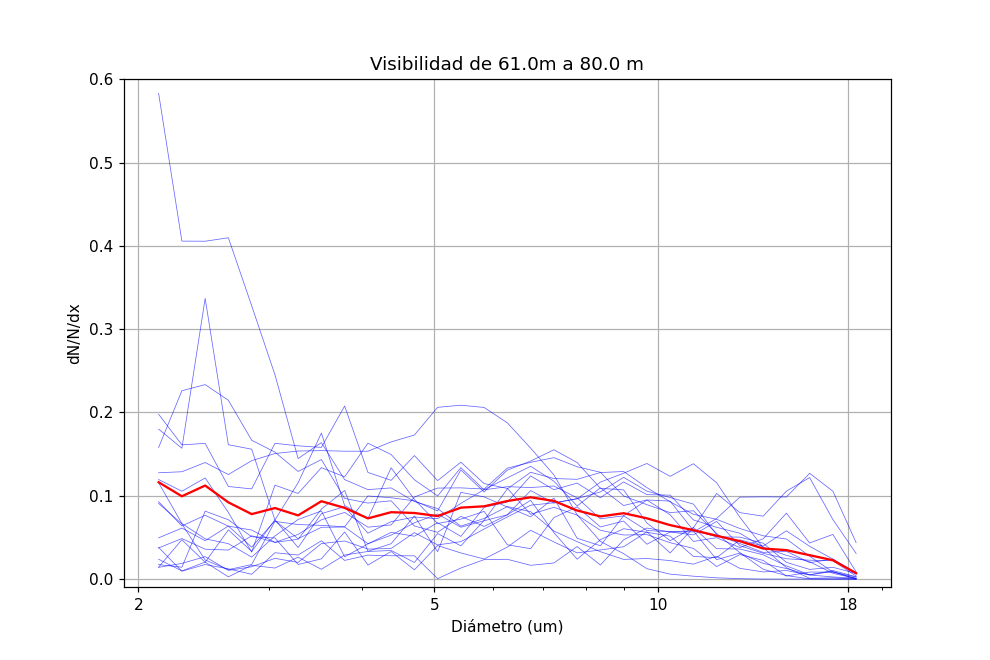

<IPython.core.display.Javascript object>


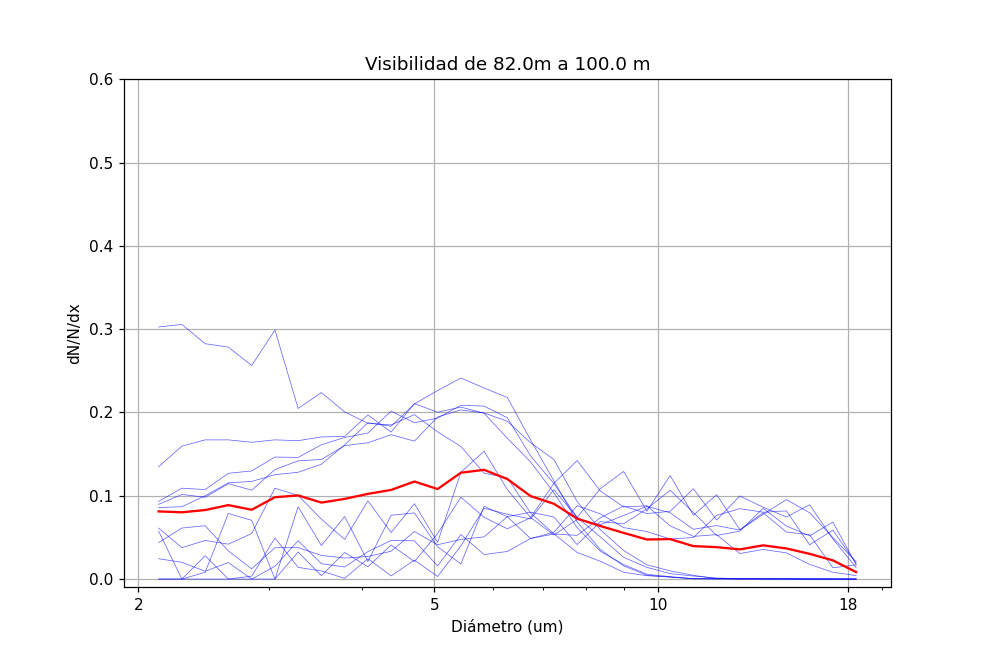

<IPython.core.display.Javascript object>


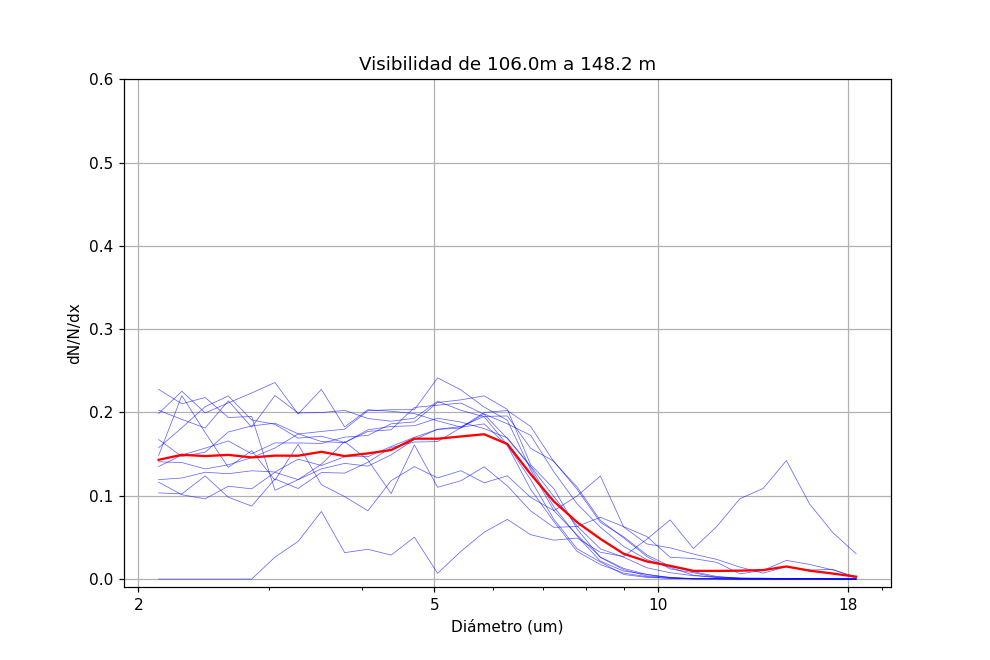

<IPython.core.display.Javascript object>


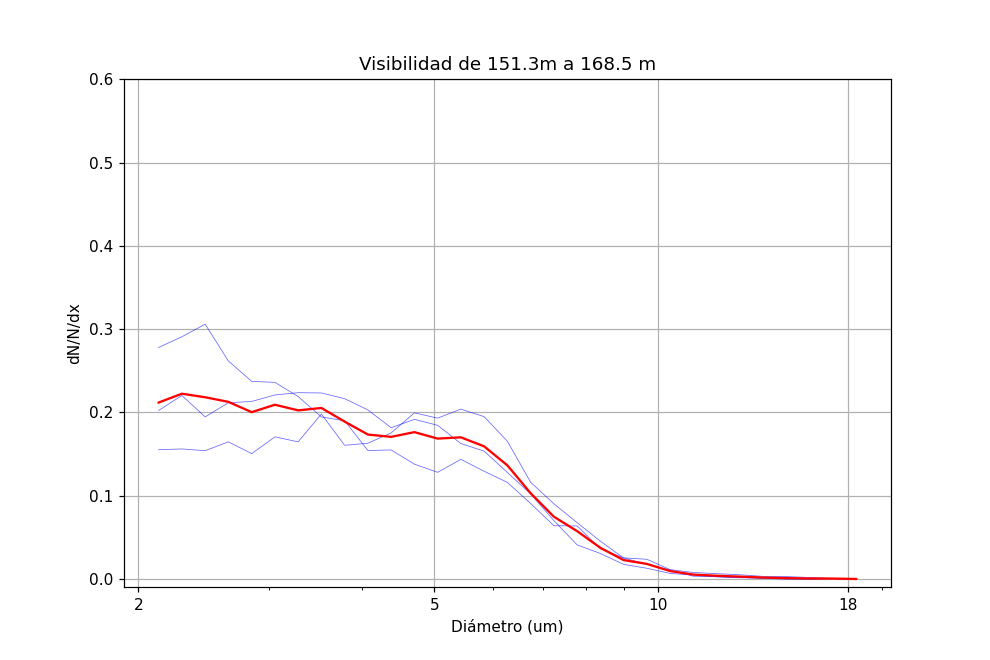

In [12]:
# primeros 10 min // SOLO GRUESOS, NORMALIZADOS

dx = [0.007,0.008,0.009,0.009,0.01,0.011,0.011,0.012,0.013,0.014,0.015,0.016,0.018,0.019,0.02,0.022,0.024,0.025,0.027
,0.029,0.031,0.034,0.036,0.039,0.042,0.045,0.048,0.052,0.056,0.06,0.065,0.069,0.075,0.08,0.086,0.093,0.099,0.107,0.115
,0.123,0.133,0.143,0.153,0.165,0.177,0.19,0.204,0.22,0.236,0.254,0.272,0.293,0.315,0.338,0.363,0.39,0.42,0.451,0.484
,0.521,0.559,0.601,0.646,0.694,0.746,0.802,0.862,0.926,0.995,1.069,1.149,1.235,1.327]

menos_20 = ensayos_natural_pre.loc[ensayos_natural_pre["Visibilidad corregida (m)"] <= 20]
de20_30 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 20) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 30)]
de30_40 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 30) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 40)]
de40_50 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 40) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 50)]
de50_60 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 50) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 60)]
de60_80 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 60) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 80)]
de80_100 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 80) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 100)]
de100_150 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 100) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 150)]
mas_150 = ensayos_natural_pre.loc[(ensayos_natural_pre["Visibilidad corregida (m)"] > 150) & (ensayos_natural_pre["Visibilidad corregida (m)"] <= 2001)]

totales = [menos_20, de20_30, de30_40, de40_50, de50_60, de60_80, de80_100, de100_150, mas_150]

for i in totales:
    i.reset_index(drop=True, inplace=True)
    suma_total = []
    suma_gruesos = []
    suma_finos = []
    ult_col = i.shape[1]-2
    finos = np.array(i.iloc[:,3:45])
    gruesos = np.array(i.iloc[:,45:ult_col])
    for n in range(gruesos.shape[0]): # el mismo para ambos
        suma_gruesos.append(np.sum(gruesos[n,:]))
        suma_finos.append(np.sum(finos[n,:]))
        suma_total.append(suma_finos[n]+suma_gruesos[n])
    
    densidad_finos = np.empty((finos.shape[0],finos.shape[1]))
    densidad_gruesos = np.empty((gruesos.shape[0],gruesos.shape[1]))
    for k in range(finos.shape[0]):
        for l in range(finos.shape[1]):
            densidad_finos[k,l] = (1/suma_finos[k])*(finos[k,l])*(1/dx[l])
        for m in range(gruesos.shape[1]):
            densidad_gruesos[k,m] = (1/suma_gruesos[k])*(gruesos[k,m])*(1/dx[m+finos.shape[1]])
    maximo_f = np.max(densidad_finos)
    maximo_g = np.max(densidad_gruesos)
    
    media = []
    for k in range(31):
        media.append(promedio(densidad_gruesos[:,k]))
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_title('Visibilidad de ' + str(min(i.iloc[:,77])) + 'm a ' + str(max(i.iloc[:,77])) + ' m')
    ax.set_xscale('log')
    ax.set_ylim(-0.01,0.6)
    ax.set_xlabel('Diámetro (um)')
    ax.set_ylabel('dN/N/dx')
    ax.set_xticks([2,5,10,18], minor=False)
    labels = [2,5,10,18]
    ax.set_xticklabels(labels)
    ax.grid(True)
    for j in range(len(i)):
        ax.plot(diams_g,densidad_gruesos[j,:], color='blue', alpha=0.6, linewidth = 0.5)
    ax.plot(diams_g,media, color = 'red')
    plt.savefig(ruta_proces+ '/Gráficos/ensayos10min_visi' + str(min(i.iloc[:,77])) + '_a_' + str(max(i.iloc[:,77])) + '.png')

<IPython.core.display.Javascript object>


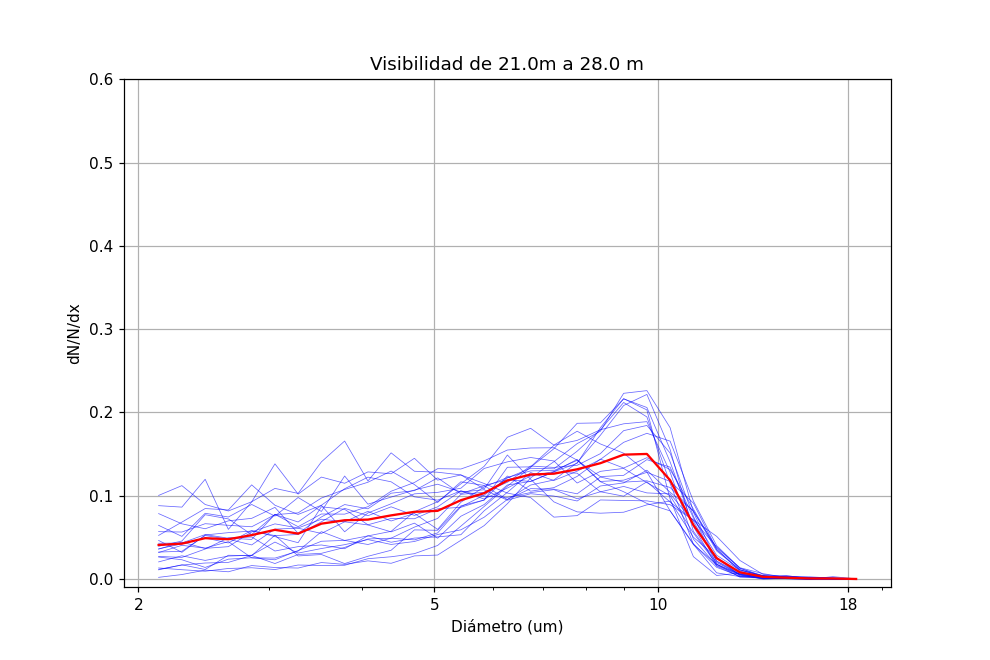

<IPython.core.display.Javascript object>


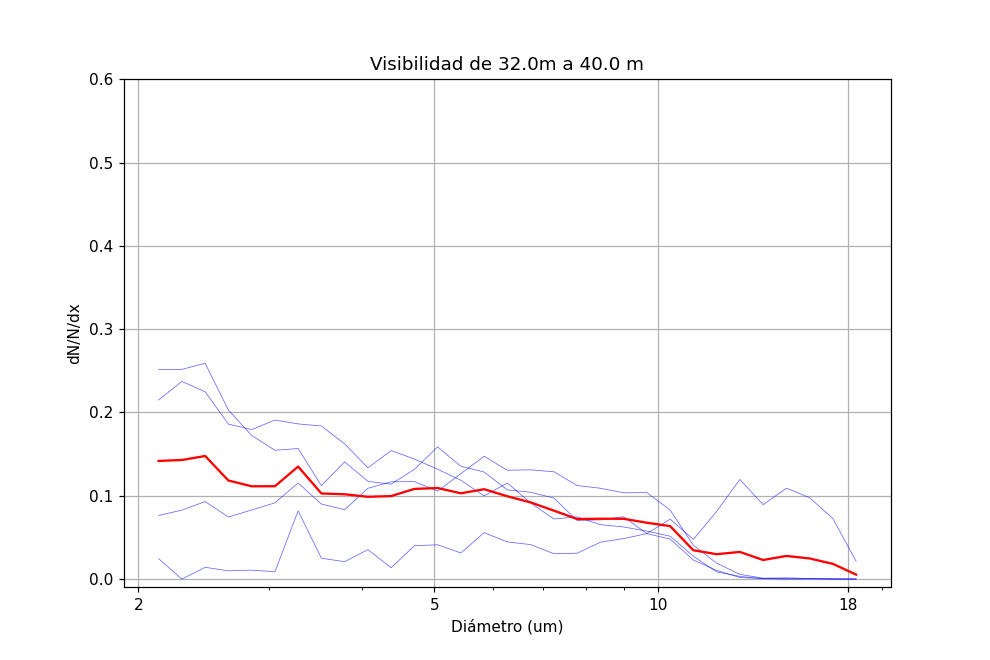

<IPython.core.display.Javascript object>


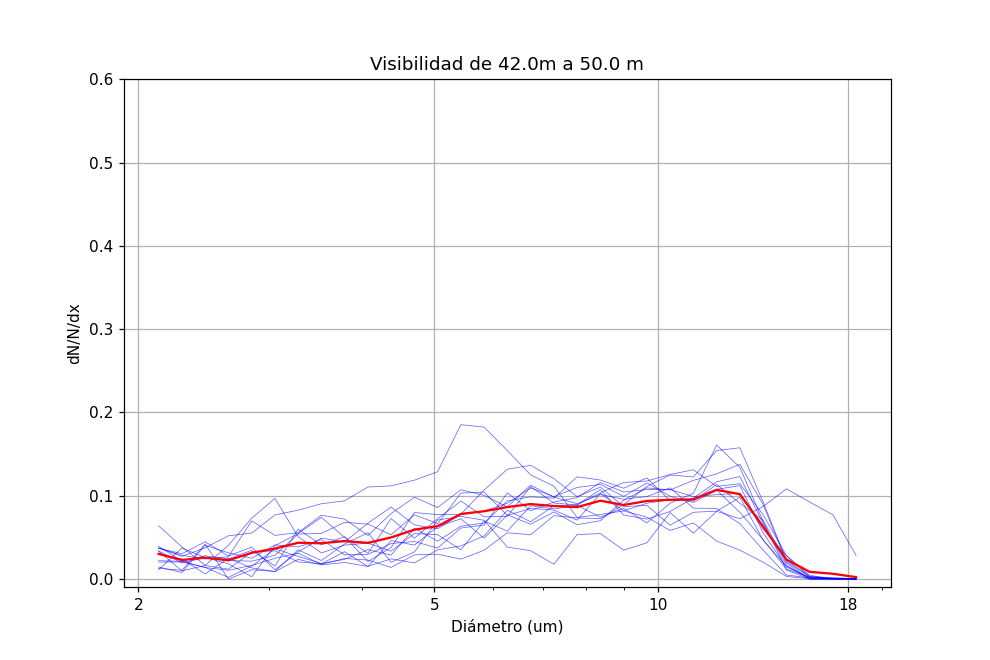

<IPython.core.display.Javascript object>


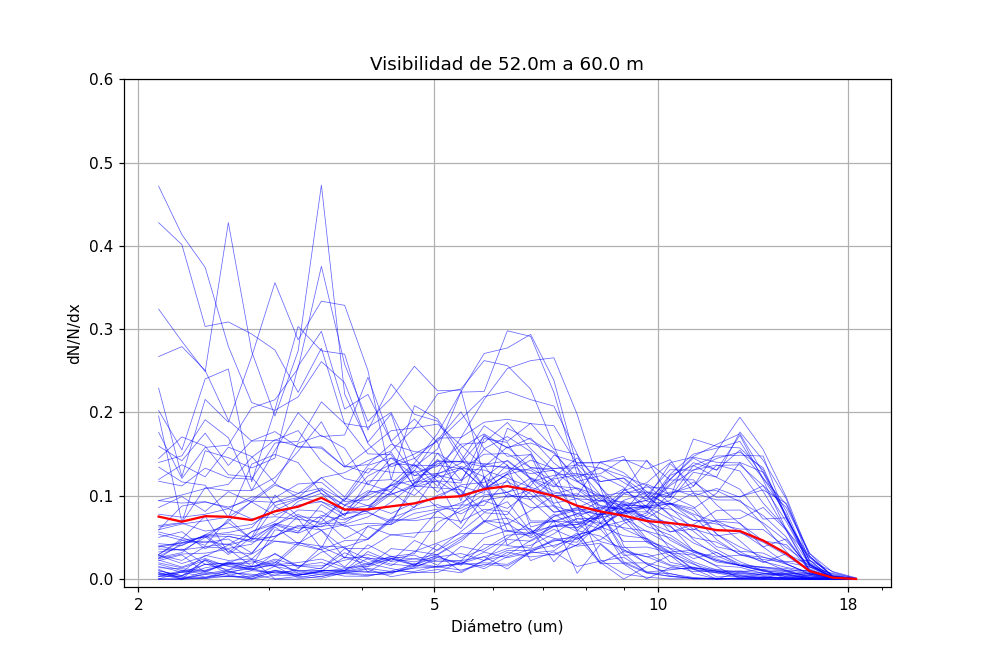

<IPython.core.display.Javascript object>


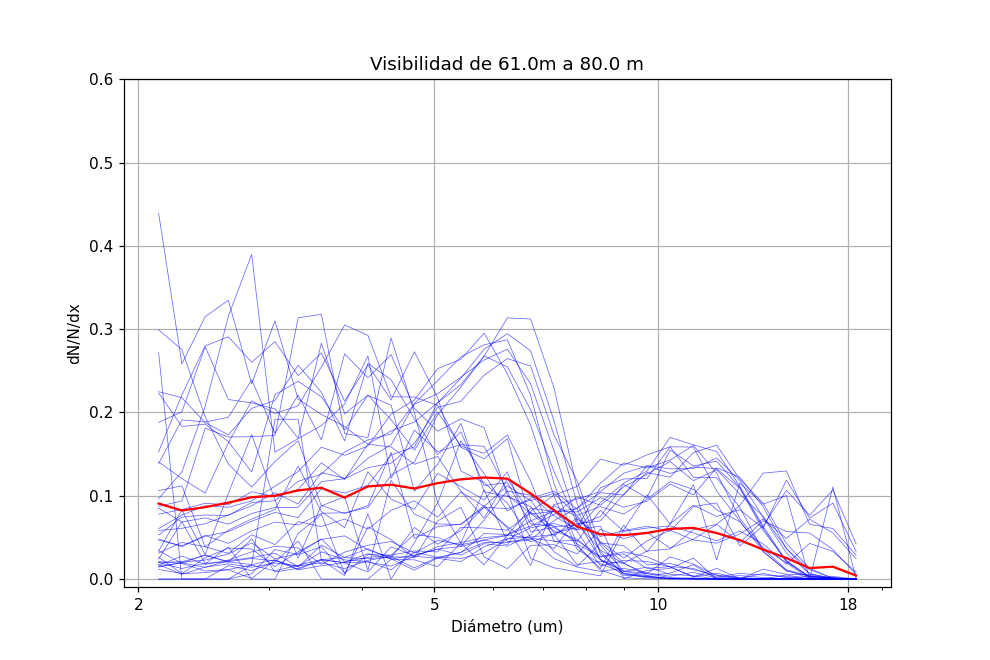

<IPython.core.display.Javascript object>


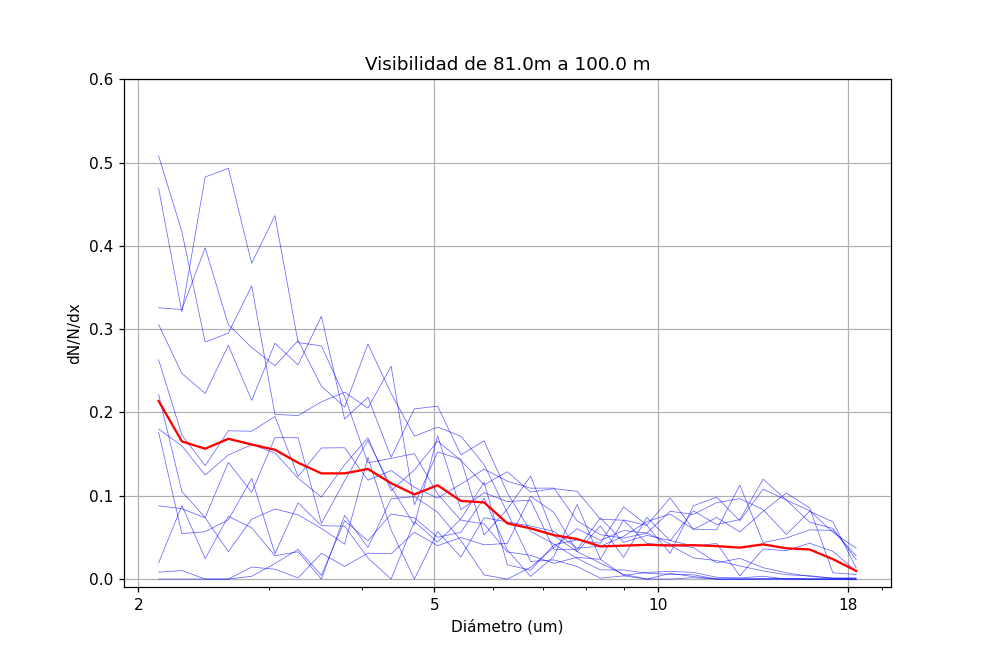

<IPython.core.display.Javascript object>


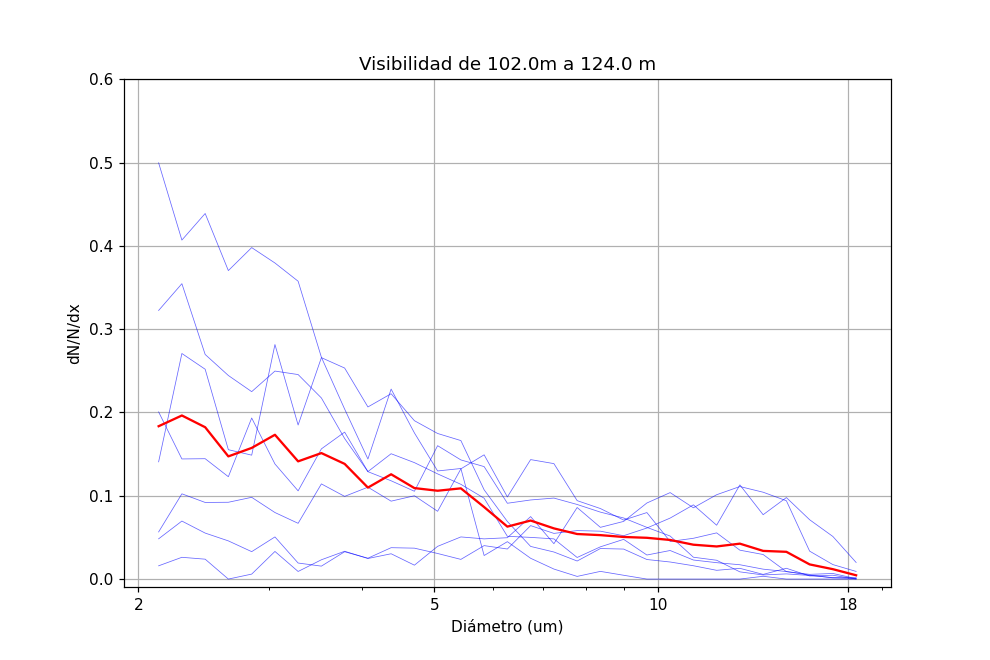

<IPython.core.display.Javascript object>


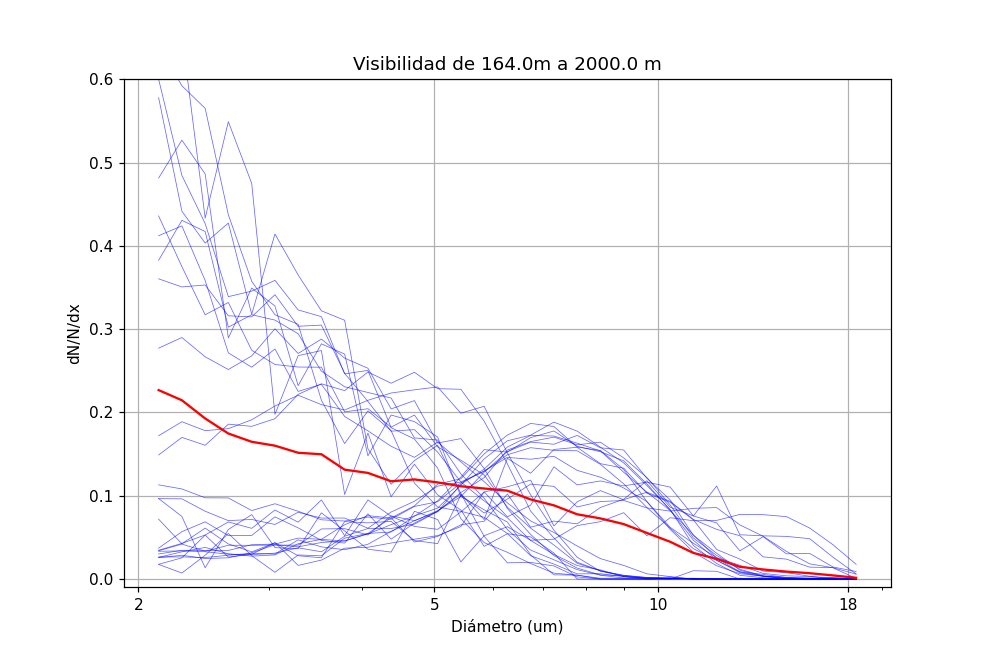

In [13]:
# últimos 12 min

#menos_20 = ensayos_natural_post.loc[ensayos_natural_post["Visibilidad corregida (m)"] <= 20]
de20_30 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 20) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 30)]
de30_40 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 30) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 40)]
de40_50 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 40) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 50)]
de50_60 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 50) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 60)]
de60_80 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 60) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 80)]
de80_100 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 80) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 100)]
de100_150 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 100) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 150)]
mas_150 = ensayos_natural_post.loc[(ensayos_natural_post["Visibilidad corregida (m)"] > 150) & (ensayos_natural_post["Visibilidad corregida (m)"] <= 2001)]

totales = [de20_30, de30_40, de40_50, de50_60, de60_80, de80_100, de100_150, mas_150]

for i in totales:
    i.reset_index(drop=True, inplace=True)
    suma_total = []
    suma_gruesos = []
    suma_finos = []
    ult_col = i.shape[1]-2
    finos = np.array(i.iloc[:,3:45])
    gruesos = np.array(i.iloc[:,45:ult_col])
    for n in range(gruesos.shape[0]): # el mismo para ambos
        suma_gruesos.append(np.sum(gruesos[n,:]))
        suma_finos.append(np.sum(finos[n,:]))
        suma_total.append(suma_finos[n]+suma_gruesos[n])
    
    densidad_finos = np.empty((finos.shape[0],finos.shape[1]))
    densidad_gruesos = np.empty((gruesos.shape[0],gruesos.shape[1]))
    for k in range(finos.shape[0]):
        for l in range(finos.shape[1]):
            densidad_finos[k,l] = (1/suma_finos[k])*(finos[k,l])*(1/dx[l])
        for m in range(gruesos.shape[1]):
            densidad_gruesos[k,m] = (1/suma_gruesos[k])*(gruesos[k,m])*(1/dx[m+finos.shape[1]])
    maximo_f = np.max(densidad_finos)
    maximo_g = np.max(densidad_gruesos)
    
    media = []
    for k in range(31):
        media.append(promedio(densidad_gruesos[:,k]))
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_title('Visibilidad de ' + str(min(i.iloc[:,77])) + 'm a ' + str(max(i.iloc[:,77])) + ' m')
    ax.set_xscale('log')
    ax.set_ylim(-0.01,0.6)
    ax.set_xlabel('Diámetro (um)')
    ax.set_ylabel('dN/N/dx')
    ax.set_xticks([2,5,10,18], minor=False)
    labels = [2,5,10,18]
    ax.set_xticklabels(labels)
    ax.grid(True)
    for j in range(len(i)):
        ax.plot(diams_g,densidad_gruesos[j,:], color='blue', alpha=0.6, linewidth = 0.5)
    ax.plot(diams_g,media, color = 'red')
    plt.savefig(ruta_proces+ '/Gráficos/ensayosultimosmin_visi' + str(min(i.iloc[:,77])) + '_a_' + str(max(i.iloc[:,77])) + '.png')

In [ ]:
# niebla generada

menos_20 = ensayos_generada.loc[ensayos_generada["Visibilidad corregida (m)"] <= 20]
de20_30 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 20) & (ensayos_generada["Visibilidad corregida (m)"] <= 30)]
de30_40 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 30) & (ensayos_generada["Visibilidad corregida (m)"] <= 40)]
de40_50 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 40) & (ensayos_generada["Visibilidad corregida (m)"] <= 50)]
de50_60 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 50) & (ensayos_generada["Visibilidad corregida (m)"] <= 60)]
de60_80 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 60) & (ensayos_generada["Visibilidad corregida (m)"] <= 80)]
de80_100 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 80) & (ensayos_generada["Visibilidad corregida (m)"] <= 100)]
de100_150 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 100) & (ensayos_generada["Visibilidad corregida (m)"] <= 150)]
mas_150 = ensayos_generada.loc[(ensayos_generada["Visibilidad corregida (m)"] > 150) & (ensayos_generada["Visibilidad corregida (m)"] <= 2001)]

totales = [menos_20, de20_30, de30_40, de40_50, de50_60, de60_80, de80_100, de100_150, mas_150]

for i in totales:
    i.reset_index(drop=True, inplace=True)
    ult_col = i.shape[1]-2
    granos = np.array(i.iloc[:,3:ult_col])
    densidad = np.empty((granos.shape[0],granos.shape[1]))
    for k in range(granos.shape[0]):
        for l in range(granos.shape[1]):
            densidad[k,l] = (granos[k,l])*(1/dx[l])
    maximo = np.max(densidad)
    
    media = []
    for k in range(73):
        media.append(promedio(granos[:,k]))
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_title('Visibilidad de ' + str(min(i.iloc[:,77])) + 'm a ' + str(max(i.iloc[:,77])) + ' m')
    ax.set_xscale('log')
    ax.set_ylim(-1,60)
    ax.set_xlabel('Diámetro (um)')
    ax.set_ylabel('dN')
    ax.set_xticks([0.1,0.5,1,2,5,10,18], minor=False)
    labels = [0.1,0.5,1,2,5,10,18]
    ax.set_xticklabels(labels)
    ax.grid(True)
    for j in range(len(i)):
        ax.plot(diams,granos[j,:], color='black', alpha=0.7, linewidth = 0.5)
    ax.plot(diams,media, color = 'red')
    plt.savefig(ruta_proces+ '/Gráficos/ensayosgenerada_visi' + str(min(i.iloc[:,77])) + '_a_' + str(max(i.iloc[:,77])) + '.png')